<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>

<hr />

# <h1 align="center"> A Simple Neural Network - Theory </h1>

<hr />
<center>Constructor Academy, 2024</center>

### Contents

1. The Building Blocks of Neural Networks
    1. A Single Neuron
    2. The Activation Function
    3. The Loss Function
2. The Architecture of Neural Networks: Layers
3. The Optimization Process of Neural Networks
    1. Forward Propagation
    2. Back Propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In Notebook 2, you already got a sense of what a Neural Network is. If you need a refresher, please watch the video again (https://www.youtube.com/watch?v=aircAruvnKk&t=4s). Now, we have all the mathematical building blocks ready to set up our first network.

But before, we have to understand the basic building blocks (1) and how they interact with each other (2). It will look like the one in the picture below.

<center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/neural_network_w_matrices.png" width=500/>> </center>


Neural networks are a class of machine learning algorithms used to model complex patterns in datasets using multiple hidden layers and non-linear activation functions. A neural network takes an input, passes it through multiple layers of hidden neurons (mini-functions with unique coefficients that must be learned), and outputs a prediction representing the combined input of all the neurons.

Neural networks are trained iteratively using optimization techniques like gradient descent. After each cycle of training, an error metric is calculated based on the difference between prediction and target (e.g. the desired outcome). The derivatives of this error metric are calculated and propagated back through the network using a technique called back propagation. Each neuron's coefficients (weights) are then adjusted relative to how much they contributed to the total error. This process is repeated iteratively until the network error drops below an acceptable threshold.

Let's look at each of these steps more closely.

### 1. The Building Blocks of a Neural Network

#### 1. 1. A Single Neuron

Neural networks are somewhat related to logistic regression. Basically, we can think of logistic regression as a single neuron. But what *exactly* is a neuron?

It is the most basic building block of a neural network (one of the green circles in the diagram above). It takes in some inputs and calculates an output. In purely mathematical terms, a neuron is a placeholder for a mathematical function, and its only job is to provide an output by applying the function on the inputs provided.

<center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/neuron.png" width=500/></center>

This output is calculated in two steps:
1. Application of a linear function ("the regression part"): The weighted sum of the inputs is calculated

$$
z = \sum_{i} w_{i} x_{i}+b\;\;or\;\;z=w^{T}x+b
$$

2. Application of a non-linear function ($\sigma$) ("the logistic part"): non-linear transformation of the weighted sum, using a so-called activation function

$$
a = \sigma(z) = \sigma(\sum_{i} w_{i} x_{i}+b)
$$

-------
*Remark: You might have noticed the term b in the two equations above. These bias terms are additional constants added to the weighted input before the activation function is applied. Bias terms help models represent patterns that do not necessarily pass through the origin. If you don't understand this concept yet, don't worry. It is not essential to understanding how neural networks work. This will be covered in the course.*

#### 1. 2. The Activation Function

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range depending on which activation function is used.

<center><img src="https://drive.google.com/uc?id=12KI809XbN9Y1VoqsWM5KnPzcTEcHxE18" width="500" style="background:none; border:none; box-shadow:none;" /></a> </center>

So what types of activations are used in neural networks? Most commonly, three different functions are applied. Remember the sigmoid and tanh function from Notebook 2? Those are two of them. The third, and the most popular of the three, is the rectified linear unit function or ReLU:

$$
f(z)=\max (0, z)
$$

Let's plot them and their derivatives to inspect their shape. You will see in section 2 and 3 why the calculation of their derivatives is necessary.

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

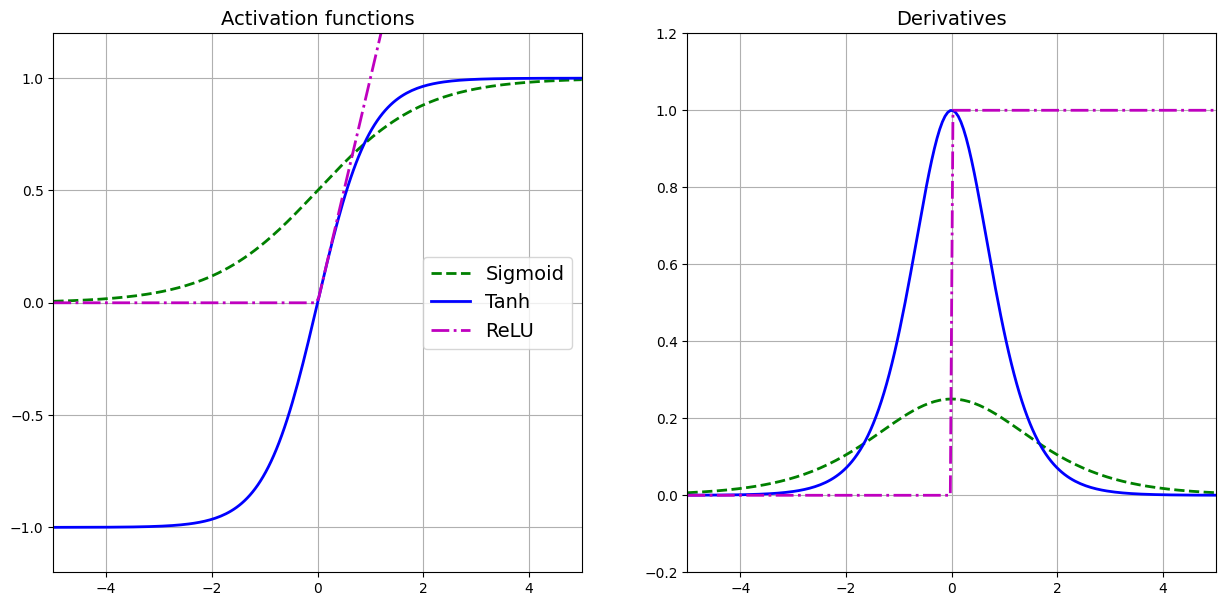

In [3]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,7))

plt.subplot(121)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
None

#### 1. 3. The Loss Function

A loss function, or cost function, is a wrapper around our model's predict function that tells us "how good" the model is at making predictions for a given set of parameters. The loss function has its own curve and its own derivatives. The slope of this curve tells us how to change our parameters to make the model more accurate!  

We use the model to make predictions. We use the cost function to update our parameters. Our cost function can take a variety of forms as there are many different cost functions available.

We won't get into the specifics of cost functions in this tutorial, this will be done during the course.

### 2. The Architecture of a Neural Network: Layers

The simplest version of a neural network consists of only one neuron. But what if we combined multiple neurons and stacked them vertically? For one, each neuron would transform the numerical data coming from the input layer (on the very left) in a different way as long as the parameters (the weights of the neurons $w_{Hi}$ and $w_{Oi}$) were initialized differently. You can see conceptually that the transformations of each individual neuron would yield diverse results, weighing some inputs more strongly than others. So to speak, we are looking at the inputs from a lot of different "angles" simultaneously.

Mathematically, not a whole lot changes. Now, we don't take the dot product of two vectors like with just one neuron, but the dot product of two matrices $W$ and $X$. Consequently, $z$ and $b$ are now vectors and the activation function is applied to each element of the vector $z$ (element-wise multiplication), yielding the vector $h$.

Finally, we need to combine all these transformations into a format which lends itself to solve the problem at hand. This happens in the final layer of the network, called the output layer. It receives input from the previous hidden layer, optionally applies an activation function, and returns an output representing the model's prediction.

$$
\mathbf{z}=\mathbf{W}^{T}\mathbf{X}+\mathbf{b}
$$

$$
\mathbf{h} = \sigma(\mathbf{z})
$$

<center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/neural_network_w_matrices.png" width=500/></center>

------
*Remark: You might have noticed that in the depicted network above, there are two neurons in the output layer. What does that mean? With neural networks, it is possible to predict not just a single outcome but multiple related outcomes. For example, you could examine a picture and check if there is a car in it ($O_{1}$) AND check if there is a pedestrian in the photo ($O_{2}$).*

##### Exercise

Replace the "None" statements with the appropriate layer size of the graph above.

In [4]:
INPUT_LAYER_SIZE = 1
HIDDEN_LAYER_SIZE = 2
OUTPUT_LAYER_SIZE = 2

## 3. The Optimization Process of Neural Networks

### 3.1. Forward Propagation

Passing through all of the steps outlined above from left to right is called forward propagation. It is essentially a chain of functions applied in succession, each of them processing the outcome of the previous layer until finally making a prediction.

To take advantage of fast linear algebra, we need to store our inputs, weights, and biases in matrices. Here is our neural network diagram again with its underlying matrix representation:

<center> <img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/nn_with_matrices_displayed.png" width=500/> </center>
<br>
$$
\mathbf{x}\mathbf{w}_{H} + \mathbf{b}_{H} = \mathbf{Z}_{H} \Rightarrow ReLU(\mathbf{H}) = \mathbf{H} \Rightarrow \mathbf{H}\mathbf{w}_{O} + \mathbf{b}_{O} = \mathbf{Z}_{O} \Rightarrow sigmoid(\mathbf{Z}_{O}) \Rightarrow \mathbf{\hat{y}}
$$

In the cell above, we closely looked at the dimensions of all the components of the forward pass. This should give you all the information to replace the None statements in the function below.

Remember, there are strict requirements on the dimensions of these weight matrices. The number of rows must equal the number of neurons in the previous layer. The number of columns must match the number of neurons in the next layer.

##### Exercise

Replace all the None statememnts. Check the equation above for hints.  
More information on np.dot() can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

In [5]:
# Solutions
def relu(x):
    return np.maximum(0, x)


def feed_forward(X, Wh, Bh, Wo, Bo):
    """
    :param X: input matrix
    :param Wh: hidden layer weights
    :param Bh: bias hidden layer
    :param Wo: output layer weights
    :param Bo: output layer bias
    :return: yHat, output layer predictions
    """

    # Hidden layer
    Zh = np.dot(X, Wh) + Bh
    H = relu(Zh)

    # Output layer
    Zo = np.dot(H, Wo) + Bo
    y_hat = relu(Zo)
    
    return y_hat, H, Zh, Zo

Before we are able to run the first forward pass we have to sort out one last issue. We did not tell the neural network where to start looking for the optimal combination of weights. Because computers don't have common sense and can't just start somewhere by themselves, we have to initialize the weights $\mathbf{w}_{H}$ and $\mathbf{w}_{O}$ ourselves. The simplest strategy is to assign random numbers to it. You will learn more advanced weight initialization techniques during the program.

##### Exercise

Replace the None statements in the cell below.

More information on np.random.randn() can be found here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html  
More information on np.full() can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.full.html

In [7]:
# Solutions
def init_weights(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE):
    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE) * np.sqrt(2.0 / INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE) * np.sqrt(2.0 / HIDDEN_LAYER_SIZE)
    return Wh, Wo

def init_bias(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE):
    Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
    Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)
    return Bh, Bo

### 2.3. Back Propagation

The goals of backpropagation are straightforward: adjust each weight in the network in proportion to how much it contributes to the overall error. If we iteratively reduce each weight’s error, eventually we’ll have a series of weights that produce good predictions.

Let’s use the chain rule to calculate the derivative of cost with respect to any weight in the network. The chain rule will help us identify how much each weight contributes to our overall error and the direction to update each weight to reduce our error.

Here are the equations we need to make a prediction and calculate total error, or cost (don't worry about the cost function, just trust us for now):

<center> <img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/backprop_ff_equations.png" width=500/> </center>

Given a network consisting of a single neuron, total cost could be calculated as:

$$
\text { Cost }=C(R(Z(X,W)))
$$

Using the chain rule we can easily find the derivative of Cost with respect to weight W:

$$
\begin{aligned} C^{\prime}(W) &=C^{\prime}(R) \cdot R^{\prime}(Z) \cdot Z^{\prime}(W) \\ &=(\hat{y}-y) \cdot R^{\prime}(Z) \cdot X \end{aligned}
$$

Now that we have an equation to calculate the derivative of cost with respect to any weight, let's try to set up a back propagation function for a very simple neural network shown below:

<center><img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/backprop_visually.png" width=700/></center>

What is the derivative of the cost with respect to $\mathbf{W}_{o}$?

$$
\begin{aligned} C^{\prime}\left(W_{O}\right) &=C^{\prime}(\hat{y}) \cdot \hat{y}^{\prime}\left(Z_{O}\right) \cdot Z_{O}^{\prime}\left(W_{O}\right) \\ &=(\hat{y}-y) \cdot R^{\prime}\left(Z_{O}\right) \cdot H \end{aligned}
$$

And how about with respect to $\mathbf{W}_{h}$? To find out we just keep going further back in our function applying the chain rule recursively until we get to the function that has the $\mathbf{W}_{h}$ term.

$$
\begin{aligned} C^{\prime}\left(W_{h}\right) &=C^{\prime}(\hat{y}) \cdot O^{\prime}\left(Z_{o}\right) \cdot Z_{o}^{\prime}(H) \cdot H^{\prime}\left(Z_{h}\right) \cdot Z_{h}^{\prime}\left(W_{h}\right) \\ &=(\hat{y}-y) \cdot R^{\prime}\left(Z_{o}\right) \cdot W_{o} \cdot R^{\prime}\left(Z_{h}\right) \cdot X \end{aligned}
$$

And just for fun, what if our network had 10 hidden layers. What is the derivative of cost for the first weight $\mathbf{W}_{1}$?

$$
\begin{array}{c}{C^{\prime}\left(w_{1}\right)=\frac{d C}{d \hat{y}} \cdot \frac{d \hat{y}}{d Z_{11}} \cdot \frac{d Z_{11}}{d H_{10}}} \\ {\frac{d H_{10}}{d Z_{10}} \cdot \frac{d Z_{10}}{d H_{9}} \cdot \frac{d H_{9}}{d Z_{9}} \cdot \frac{d Z_{9}}{d H_{8}} \cdot \frac{d Z_{8}}{d Z_{8}} \cdot \frac{d Z_{8}}{d H_{7}} \cdot \frac{d H_{7}}{d Z_{7}}} \\ {\frac{d Z_{7}}{d H_{6}} \cdot \frac{d H_{6}}{d Z_{6}} \cdot \frac{d Z_{6}}{d H_{5}} \cdot \frac{d H_{5}}{d Z_{5}} \cdot \frac{d Z_{5}}{d H_{4}} \cdot \frac{d H_{4}}{d Z_{4}} \cdot \frac{d Z_{4}}{d W_{3}}} \\ {\frac{d H_{3}}{d Z_{3}} \cdot \frac{d Z_{3}}{d H_{2}} \cdot \frac{d H_{2}}{d Z_{2}} \cdot \frac{d Z_{2}}{d H_{1}} \cdot \frac{d H_{1}}{d Z_{1}} \cdot \frac{d Z_{1}}{d W_{1}}}\end{array}
$$

See the pattern? The number of calculations required to compute cost derivatives increases as our network grows deeper. Notice also the redundancy in our derivative calculations. Each layer's cost derivative appends two new terms to the terms that have already been calculated by the layers above it. What if there was a way to save our work somehow and avoid these duplicate calculations?

#### Memoization

Memoization is a computer science term which simply means: don't recompute the same thing over and over. In memoization we store previously computed results to avoid recalculating the same function. It's handy for speeding up recursive functions of which back propagation is one. Notice the pattern in the derivative equations below:

<center> <img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/memoization.png" width=700/> </center>

Each of these layers is recomputing the same derivatives! Instead of writing out long derivative equations for every weight, we can use memoization to save our work as we back propagation error through the network. To do this, we define 3 equations (below), which together encapsulate all the calculations needed for back propagation. The math is the same, but the equations provide a nice shorthand we can use to track which calculations we've already performed and save our work as we move backwards through the network.

<center> <img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/backprop_3_equations.png" width=500/> </center>

We first calculate the output layer error and pass the result to the hidden layer before it. After calculating the hidden layer error, we pass its error value back to the previous hidden layer before it. And so on and so forth. As we move back through the network we apply the 3rd formula at every layer to calculate the derivative of cost with respect that layer's weights. This resulting derivative tells us in which direction to adjust our weights to reduce overall cost.

#### Layer Error

The term layer error refers to the derivative of cost with respect to a layer's input. It answers the question: how does the cost function output change when the input to that layer changes?


To calculate *output layer error* we need to find the derivative of cost with respect to the output layer input, $\mathbf{W}_{o}$. It answers the question - how are the final layer's weights impacting overall error in the network? The derivative is then:

$$
E_{o} = C^{\prime}\left(Z_{o}\right)=(\hat{y}-y) \cdot R^{\prime}\left(Z_{o}\right)
$$

To calculate the *hidden layer error* we need to find the derivative of cost with respect to the hidden layer input, $\mathbf{Z}_{h}$:

$$
C^{\prime}\left(Z_{h}\right)=(\hat{y}-y) \cdot R^{\prime}\left(Z_{o}\right) \cdot W_{o} \cdot R^{\prime}\left(Z_{h}\right)
$$

Next we can swap in the $E_{o}$ term above to avoid duplication and create a new simplified equation for Hidden layer error:

$$
E_{h}=E_{o} \cdot W_{o} \cdot R^{\prime}\left(Z_{h}\right)
$$

This formula is at the core of back propagation. We calculate the current layer's error, and pass the weighted error back to the previous layer, continuing the process until we arrive at our first hidden layer. Along the way we update the weights using the derivative of cost with respect to each weight.

#### Individual Weight Error

Let's return to our formula for the derivative of cost with respect to the output layer weight $\mathbf{W}_{o}$:

$$
C^{\prime}\left(W_{O}\right)=(\hat{y}-y) \cdot R^{\prime}\left(Z_{O}\right) \cdot H
$$

We know we can replace the first part with our equation for output layer error $E_{0}$. H represents the hidden layer activation:

$$
C^{\prime}\left(W_{o}\right)=E_{o} \cdot H
$$

So to find the derivative of cost with respect to any weight in our network, we simply multiply the corresponding layer's error times its input (the previous layer's output - Input refers to the activation from the previous layer, not the weighted input, $Z$):

$$
C^{\prime}(w) = CurrentLayerError * CurrentLayerInput
$$

#### Summary

Here are the final 3 equations that together form the foundation of back propagation:

<center> <img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/backprop_final_3_deriv_equations.png" width=500/> </center>

<center> <img src="https://cdn-images-1.medium.com/max/800/1*0hf4gLbc-2V5RMXBhluJ_A.gif" width=500/> </center>

##### Exercise

Replace the None statements in the cell below.



In [8]:
# Solutions
def relu_prime(x):
    '''
    Z - weighted input matrix

    Returns gradient of Z where all
    negative values are set to 0 and
    all positive values set to 1
    '''
    grad = np.zeros_like(x)
    grad[x > 0] = 1
    return grad

def cost(yHat, y):
    return 0.5 * (yHat - y)**2

def cost_prime(yHat, y):
    return yHat - y

def backprop(X, y, Wh, Bh, Wo, Bo, lr):

    # feed forward
    y_hat, H, Zh, Zo = feed_forward(X, Wh, Bh, Wo, Bo)

    # Layer Error
    Eo = (y_hat - y) * relu_prime(Zo)
    Eh = np.dot(Eo, Wo.T) * relu_prime(Zh)

    # Cost derivative for weights
    dWo = np.dot(H.T, Eo)
    dWh = np.dot(X.T, Eh)

    dBo = np.sum(Eo, axis=0, keepdims=True)
    dBh = np.sum(Eh, axis=0, keepdims=True)

    # Update weights
    Wh -= lr * dWh
    Wo -= lr * dWo
    Bh -= lr * dBh
    Bo -= lr * dBo

    return Wh, Bh, Wo, Bo

In [12]:
INPUT_LAYER_SIZE = 2
HIDDEN_LAYER_SIZE = 4
OUTPUT_LAYER_SIZE = 2

# define some test data
X = np.array([[1, 2],[3, 4], [5, 6]])
y = np.array([[1],[2],[3]])

# initialise weights
Wh, Wo = init_weights(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)
Bh, Bo = init_bias(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)

# test forward propagation
y_hat = feed_forward(X, Wh, Bh, Wo, Bo)

# test backward propagation
Wh, Bh, Wo, Bo = backprop(X, y, Wh, Bh, Wo, Bo, lr=0.1)


#### Further materials for understanding backpropagation

- https://www.youtube.com/watch?v=yXcQ4B-YSjQ&t=495s
- https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c
- https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76

### Wrap-Up

In this notebook, we learned the theory behind how neural networks work and how we can build a neural network from a single neuron to layers of neurons, which approximate desired results much better. We looked at the forward- and backward pass of neural networks and its mathematical underpinnings. This is merely an intro for the course. So, while it would be great if you understand everything already, you don't have to. The goal is, that you get the intuition behind it. In the next, and last, notebook, we will implement a neural network. Thus, our advice is to switch back and forth between notebook 3 and 4. Looking at code that actually does something will greatly increase your understanding.